kNN 과제

data 불러오기 및 data 살펴보기

In [74]:
import pandas as pd
df = pd.read_csv('C:/Users/galax/Downloads/fake_bills.csv', sep=';')
df.shape

(1500, 7)

In [75]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [77]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


One hot encoding (True=1, False = 0)

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) #sparse옵션이란?

ohe.fit(df[['is_genuine']])
tfd = pd.DataFrame(ohe.transform(df[['is_genuine']]), columns=['False','True'])
print(tfd)

      False  True
0       0.0   1.0
1       0.0   1.0
2       0.0   1.0
3       0.0   1.0
4       0.0   1.0
...     ...   ...
1495    1.0   0.0
1496    1.0   0.0
1497    1.0   0.0
1498    1.0   0.0
1499    1.0   0.0

[1500 rows x 2 columns]


c:\Users\galax\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
new_df = pd.concat([tfd, df[['diagonal','height_left','height_right','margin_low','margin_up','length']]], axis=1)
print(new_df)

      False  True  diagonal  height_left  height_right  margin_low  margin_up   
0       0.0   1.0    171.81       104.86        104.95        4.52       2.89  \
1       0.0   1.0    171.46       103.36        103.66        3.77       2.99   
2       0.0   1.0    172.69       104.48        103.50        4.40       2.94   
3       0.0   1.0    171.36       103.91        103.94        3.62       3.01   
4       0.0   1.0    171.73       104.28        103.46        4.04       3.48   
...     ...   ...       ...          ...           ...         ...        ...   
1495    1.0   0.0    171.75       104.38        104.17        4.42       3.09   
1496    1.0   0.0    172.19       104.63        104.44        5.27       3.37   
1497    1.0   0.0    171.80       104.01        104.12        5.51       3.36   
1498    1.0   0.0    172.06       104.28        104.06        5.17       3.46   
1499    1.0   0.0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83

결측치 시각화

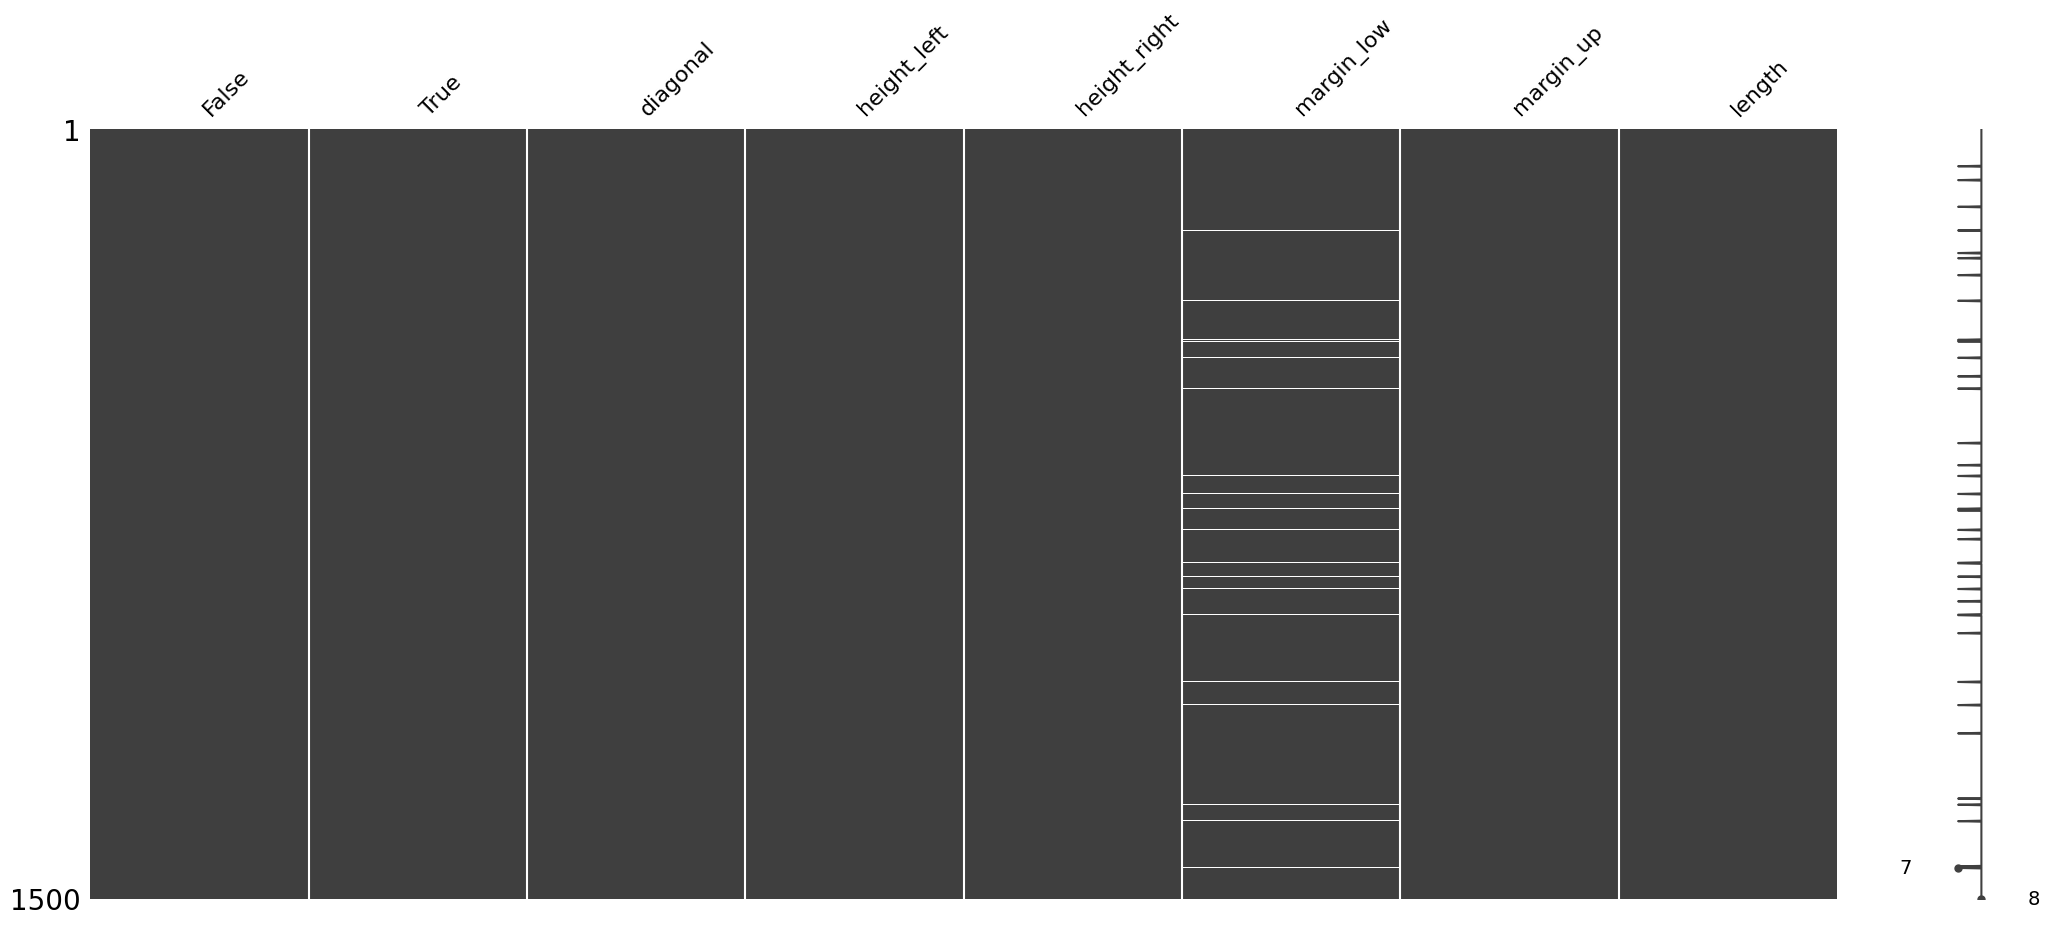

In [80]:

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(new_df)
plt.show()

In [81]:
new_df.isnull().sum().sort_values(ascending=False).head(40)

margin_low      37
False            0
True             0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
dtype: int64

kNN으로 결측치를 채워넣는다

In [82]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

df_imputed=imputer.fit_transform(new_df) ### 이건 fit과 동시에 transform
new_df_imputed = pd.DataFrame(df_imputed)
new_df_imputed.info()
new_df_imputed.head()
new_df_imputed.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
dtypes: float64(8)
memory usage: 93.9 KB


,0,1,2,3,4,5,6,7
1495,1.0,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,1.0,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,1.0,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,1.0,0.0,172.06,104.28,104.06,5.17,3.46,112.25
1499,1.0,0.0,171.47,104.15,103.82,4.63,3.37,112.07


--------------------------------여기서 막힘 ----------------------------------------------------

내 생각에 따른 one hot encoding 및 데이터 시각화


In [83]:
newdf = df.replace({'is_genuine':True}, 1)
newdf = df.replace({'is_genuine':False}, 0)
print(newdf)


     is_genuine  diagonal  height_left  height_right  margin_low  margin_up   
0          True    171.81       104.86        104.95        4.52       2.89  \
1          True    171.46       103.36        103.66        3.77       2.99   
2          True    172.69       104.48        103.50        4.40       2.94   
3          True    171.36       103.91        103.94        3.62       3.01   
4          True    171.73       104.28        103.46        4.04       3.48   
...         ...       ...          ...           ...         ...        ...   
1495          0    171.75       104.38        104.17        4.42       3.09   
1496          0    172.19       104.63        104.44        5.27       3.37   
1497          0    171.80       104.01        104.12        5.51       3.36   
1498          0    172.06       104.28        104.06        5.17       3.46   
1499          0    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     

missing data 시각화

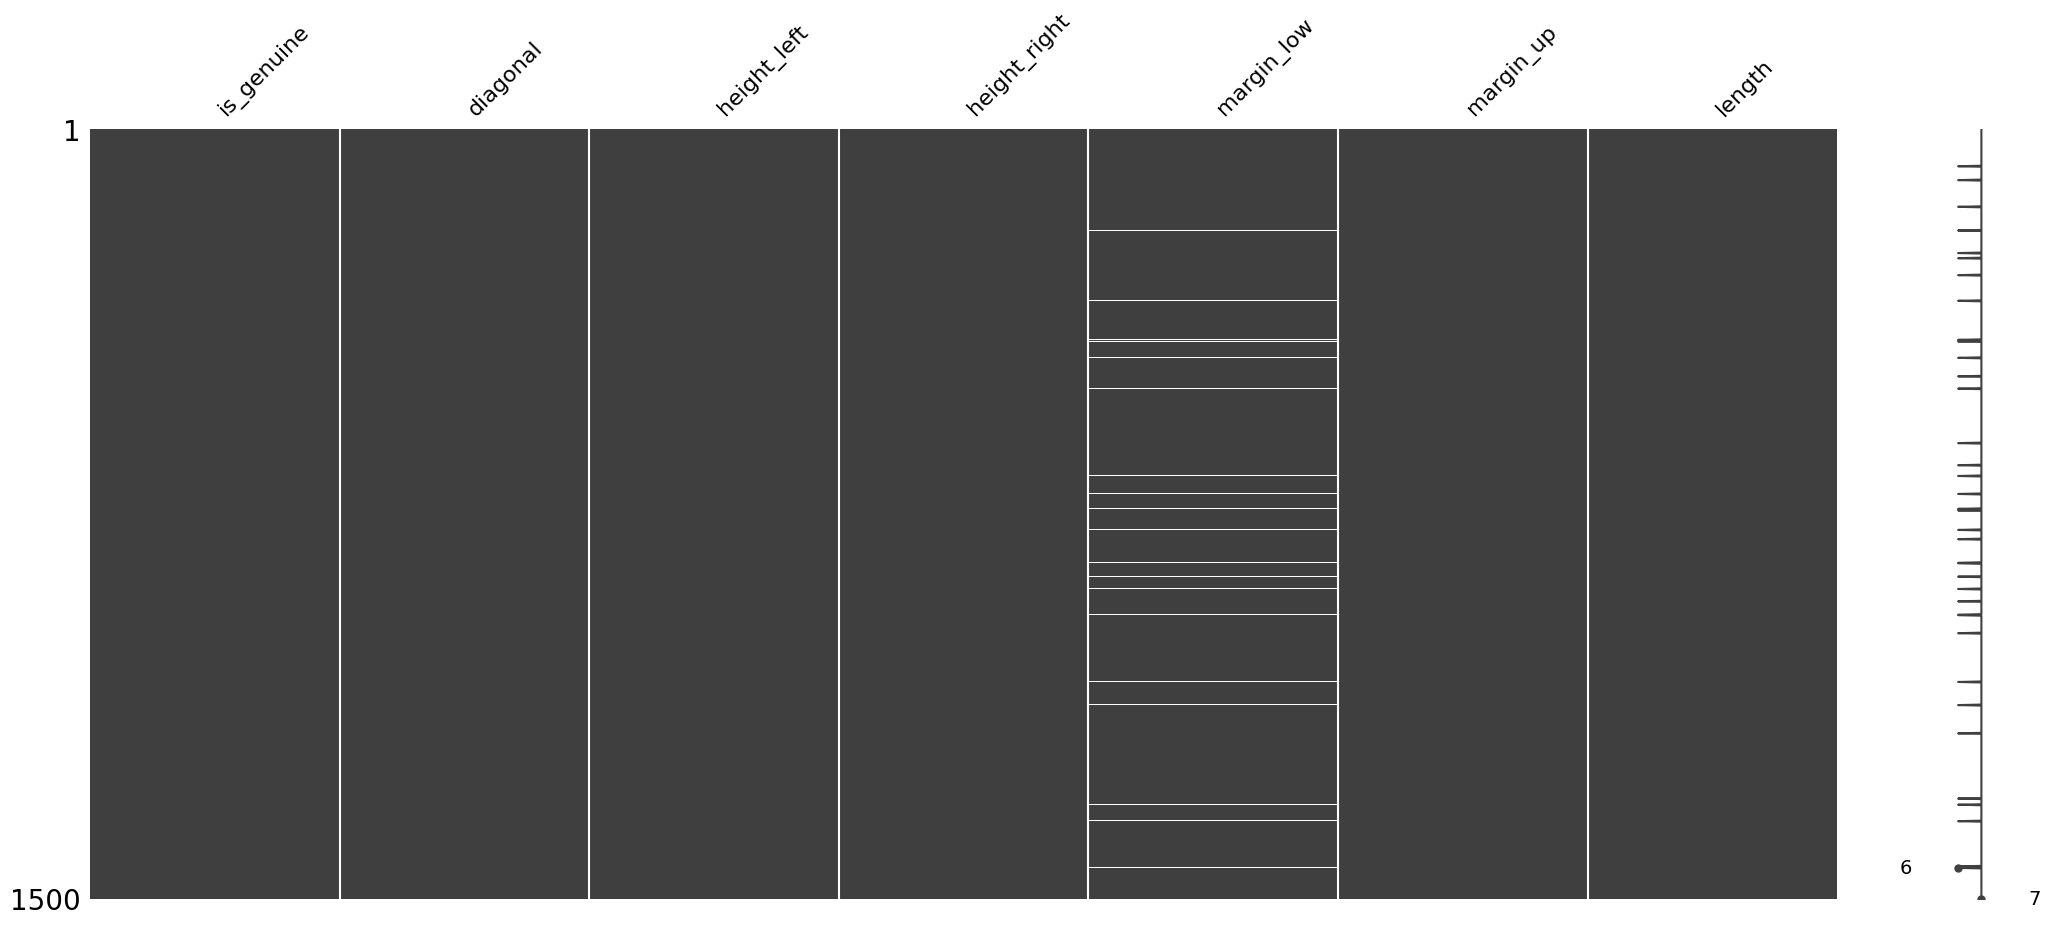

In [84]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(newdf)
plt.show()

In [85]:
newdf.isnull().sum().sort_values(ascending=False).head(40)

margin_low      37
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
dtype: int64

KNN으로 결측치 대체

In [86]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

ndf_imputed=imputer.fit_transform(newdf) ### 이건 fit과 동시에 transform
newdf_imputed = pd.DataFrame(ndf_imputed)
newdf_imputed.info()
newdf_imputed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


,0,1,2,3,4,5,6
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


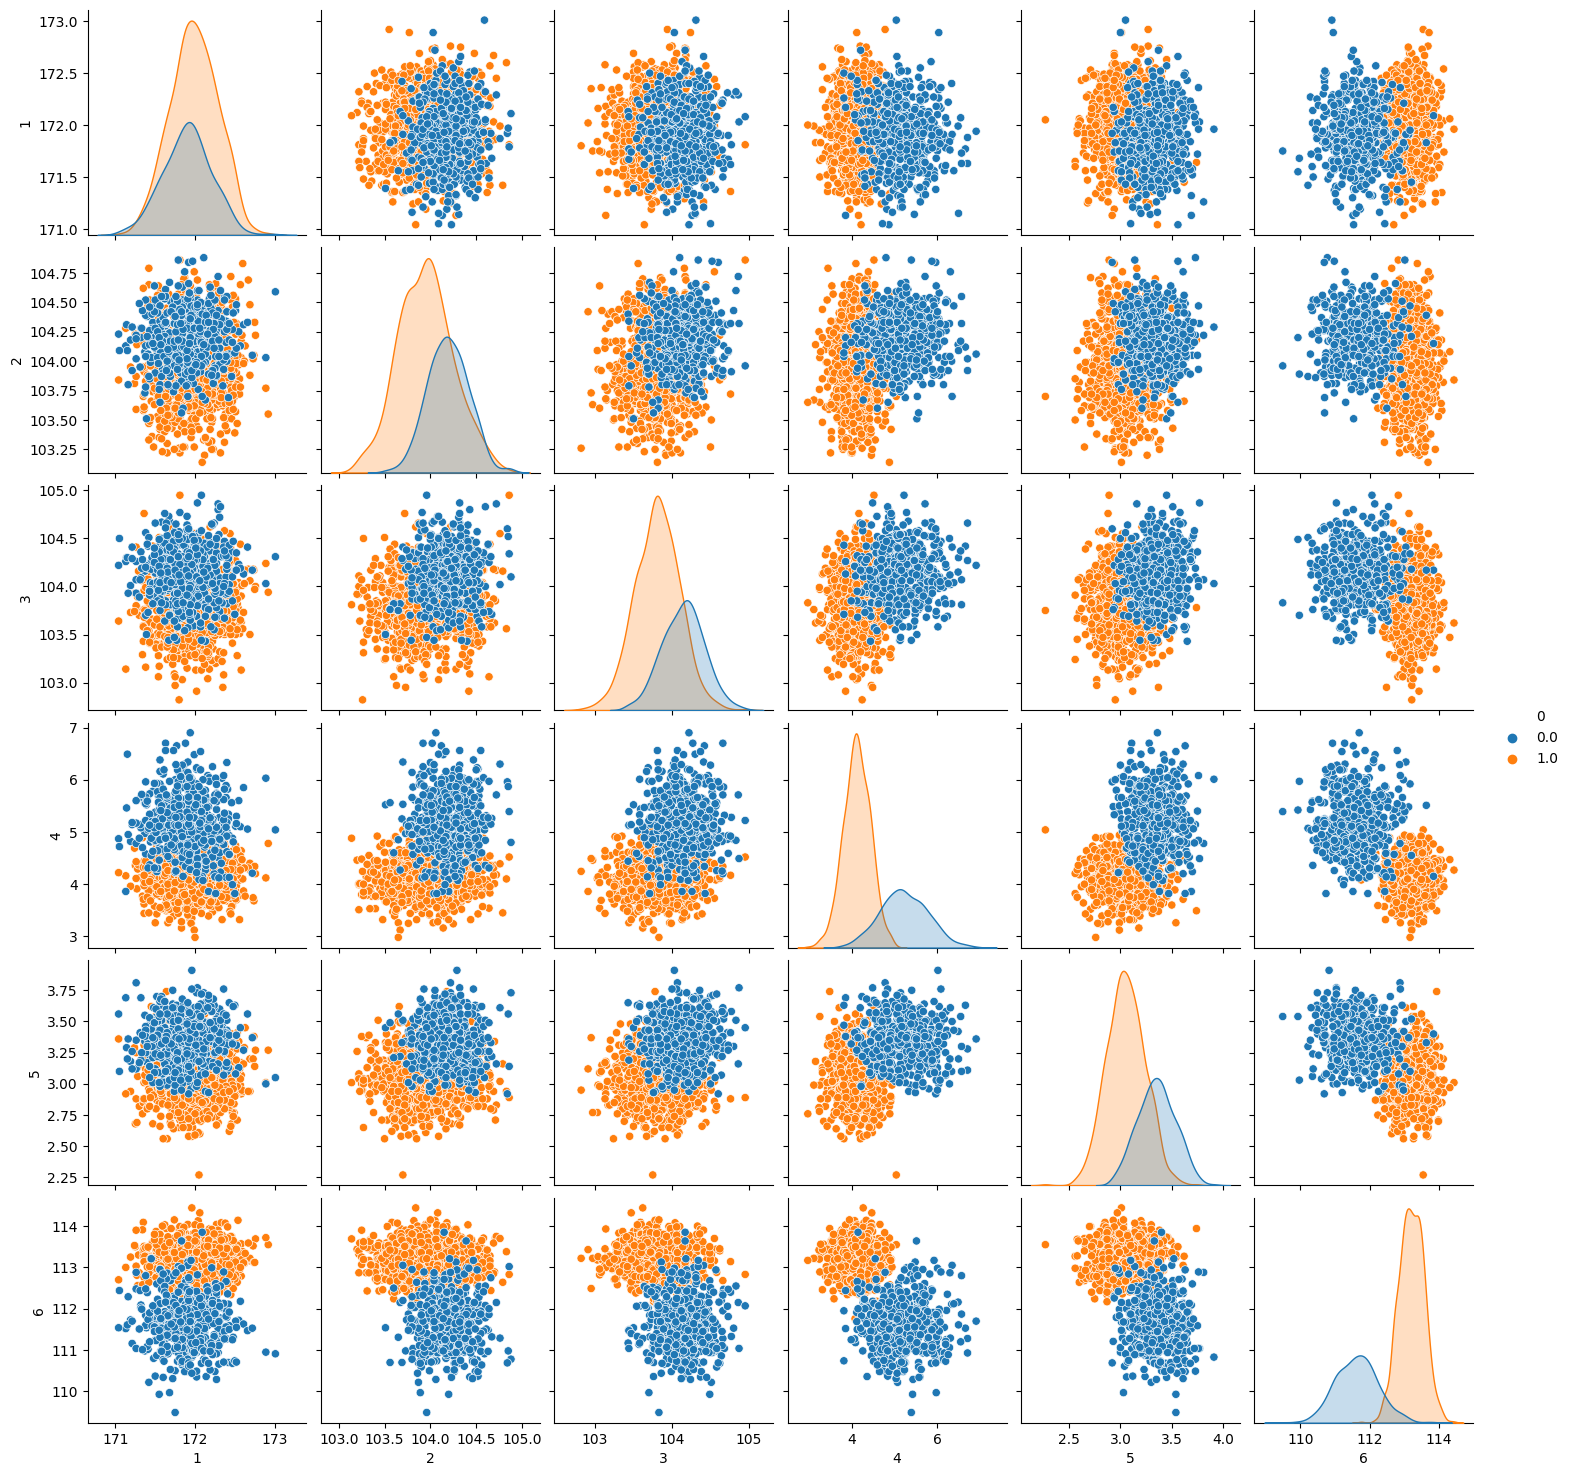

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# 아래에서 참고 삼아 전체 dataset = training + test dataset의 그래프로 확인해 보았습니다.

sns.pairplot(newdf_imputed, hue=0); ## 사실 seaborn 없이 pd.plotting.scatter_matrix로도 할 수 있다.
plt.show()


다시 열이름을 붙여서 seaborn (결과적으로 열이름을 붙이기 전과 같은값을 가지는 것을 알수 있다.)

In [88]:
newdf_imputed.columns=['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length']
newdf_imputed.info()
newdf_imputed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


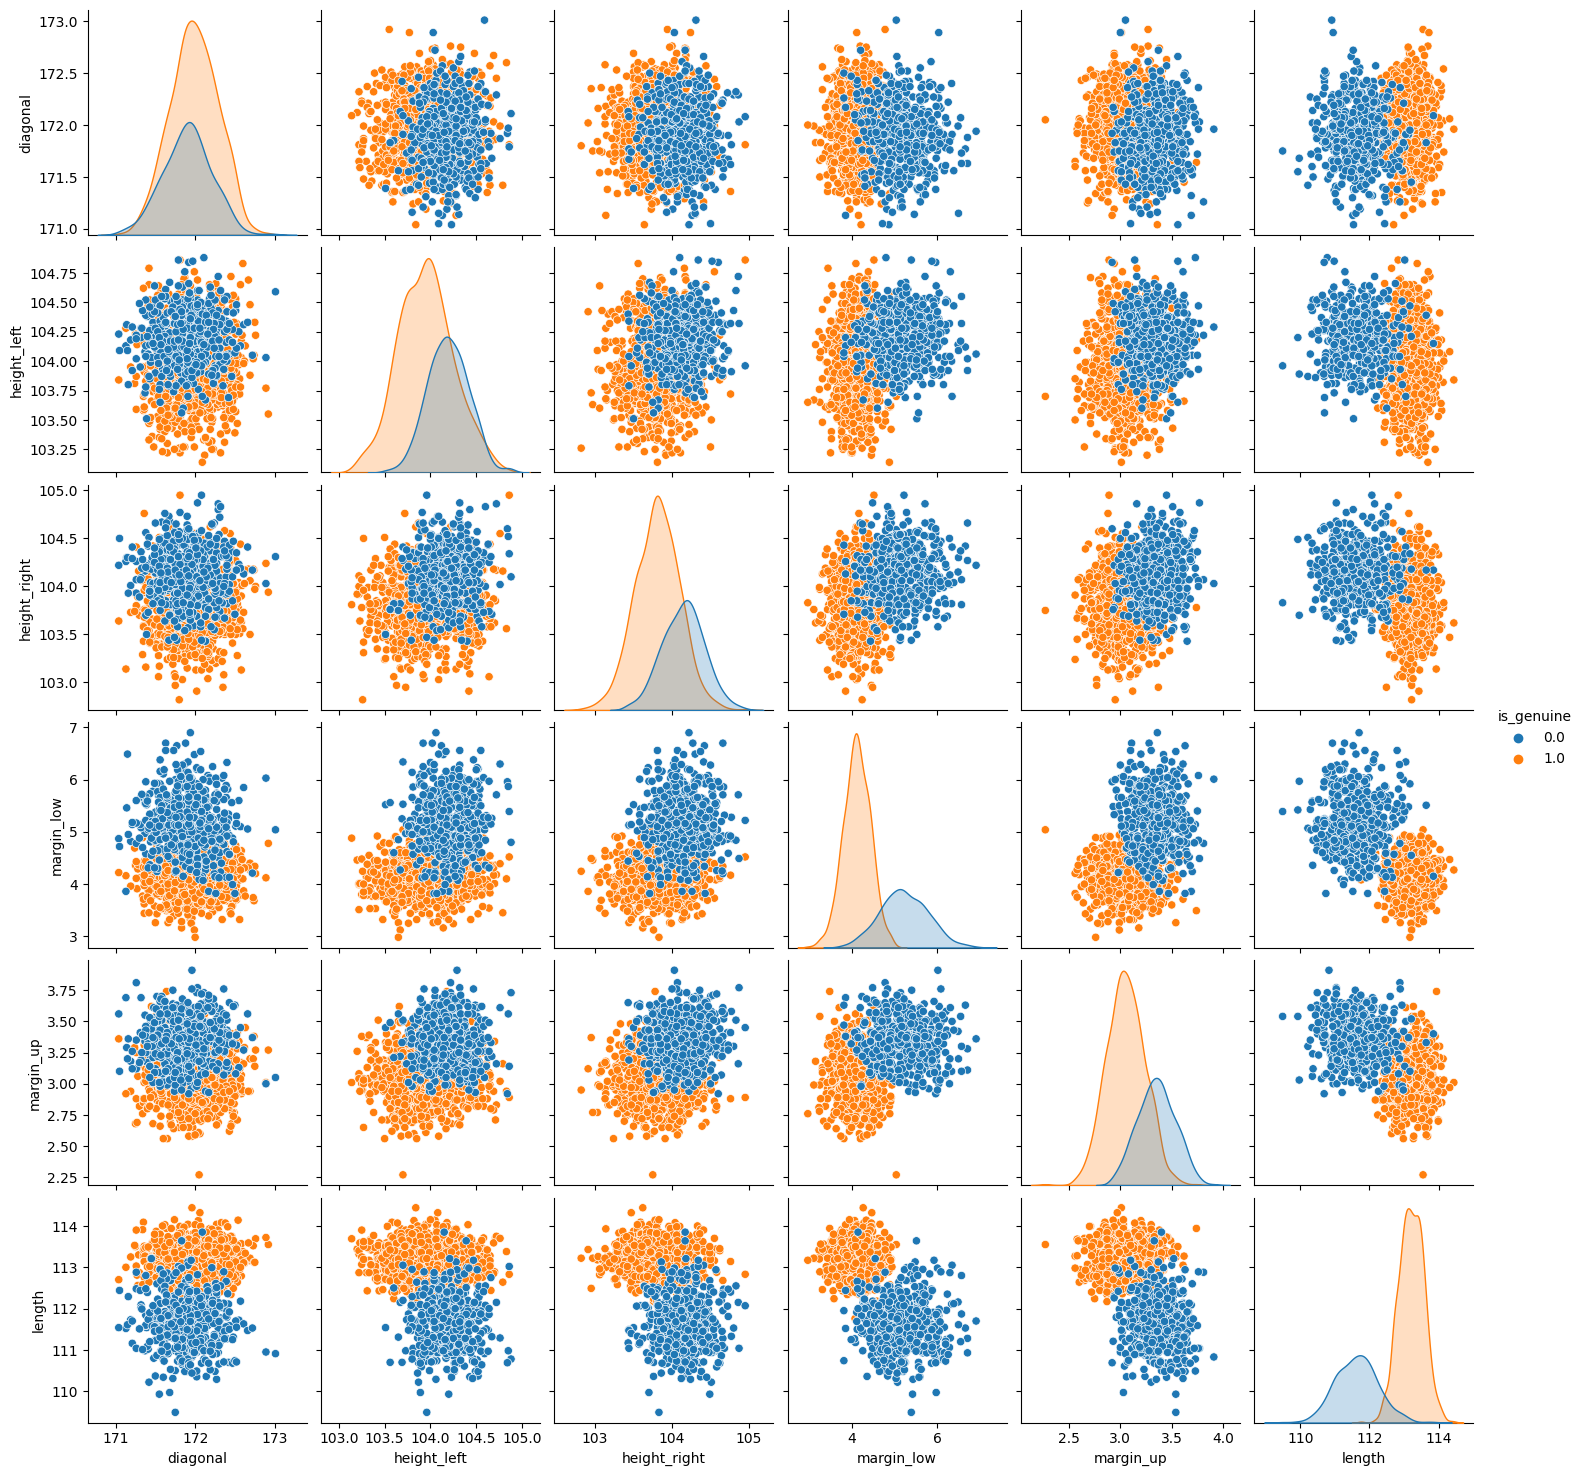

In [89]:
sns.pairplot(newdf_imputed, hue='is_genuine'); ## 사실 seaborn 없이 pd.plotting.scatter_matrix로도 할 수 있다.
plt.show()

Correlation 확인

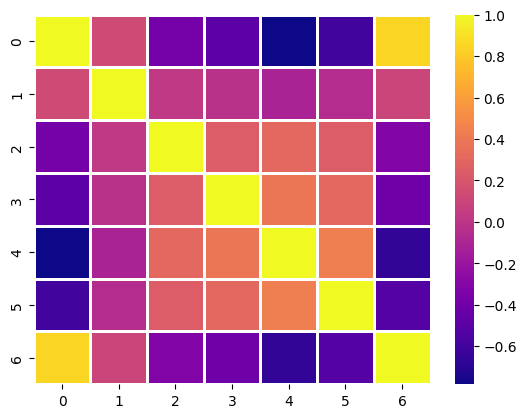

In [90]:
import numpy as np
corr_mat=np.corrcoef(newdf_imputed,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='plasma')
plt.show()

standardization을 통한 normalizing

In [91]:
'''
def standardization(values):

    normalized = []

    for value in values:
        normalized_num = (value-mean(values)) / std(values)
        normalized.append(normalized_num)
    return normalized


for x in range(len(newdf_imputed.columns)):
    newdf_imputed[x]  = standardization(newdf_imputed[x])

newdf_imputed.describe()
'''

KeyError: 0

test셋과 training set을 나눈다

In [ ]:
newdf_imputed.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    newdf_imputed.iloc[:,1:],
    newdf_imputed.loc[:,'is_genuine'],
    random_state=0,
    # stratify=y 뭔가 문제가 있다
    )

In [ ]:
X_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
247,172.45,103.97,104.32,4.15,3.23,113.45
678,172.15,103.65,103.66,3.60,3.50,113.24
722,172.30,104.04,103.93,4.33,2.92,113.19
590,171.85,103.58,104.17,4.32,3.07,113.59
186,172.21,103.48,104.04,4.40,3.00,113.15


In [ ]:
y_train.head()

247    1.0
678    1.0
722    1.0
590    1.0
186    1.0
Name: is_genuine, dtype: float64

In [ ]:
y_test.head()

471     1.0
9       1.0
1499    0.0
54      1.0
1411    0.0
Name: is_genuine, dtype: float64

이제 X들을 정규화

In [ ]:
### Test용
'''
import numpy as np
print(X_train[1])
# np.mean(X_train[1])
'''

KeyError: 1

In [ ]:
'''
def standardization(values):

    normalized = []

    for value in values:
        normalized_num = (value-mean(values)) / std(values)
        normalized.append(normalized_num)
    return normalized


for x in range(len(X_train.columns)):
    X_train[x]  = standardization(X_train[x])

X_train.describe()
'''

KeyError: 0

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

이제 KNN

In [94]:
# grid search
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(knn, grid_params,cv=10) 
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))


Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best Score :  0.9902417825537295
Best Test Score :  0.992


스코어가 가장 좋을 때 n_neighbors가 4인 것을 알 수 있다.

따라서 Final model은

In [102]:
knn_m = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 4, weights = 'uniform')
knn_m.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=4)

이제, Evaluation을 해보자

In [105]:
from sklearn.metrics import confusion_matrix
def print_test_metrics(model, X_test):
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))

print_test_metrics(knn_m, X_test)

*** Test Accuracy *** 
   0.992

*** Confusion Matrix *** 
 [[125   1]
 [  2 247]]


실제로 1(진품)이 아닌데 1(진품)으로 예측한 경우는 1번
실제로 1(진품)인데 0(가품)으로 예측한 경우는 2번

임을 알 수 있다.